In [ ]:
#conda install -c conda-forge lifelines
#conda install -c sebp scikit-survival

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, inspect, sys

from sklearn.preprocessing import MinMaxScaler
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.linear_model import CoxPHSurvivalAnalysis
from lifelines import CoxPHFitter

In [38]:
# url = 'https://raw.githubusercontent.com/S2DSLondon/Oct20_EPRI/main/Task3/Data/Merged_data/Survival_df.csv?token=AOZP7JOAVZPEI3Y43CE25R27W62RO'
#d f = pd.read_csv(url, index_col=0)
# print(df.head(5))

df = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/Survival_df.csv'),
                  index_col=0)
df_gan = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/CopulaGAN_simulated_data_survival.csv')
            )

In [69]:
df

,Observed,F_Time,NDE_cycle,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio,NLE_ratio_51_17,NLE_ratio_85_17,NLE_ratio_119_17,NLO_avg,Avg_RP,ACEE_30_Avg_58,ACEE_500_Avg_58,ACPD_Avg_58
ID,,,,,,,,,,,,,,,
41C,True,2154137.0,0,2.104871,1.185236,1.002988,1.559453,0.893268,1.107898,0.462483,5.576476,190.979294,-0.137640,-2.866030,4.804749
44C,True,1318034.0,0,2.280959,1.365329,0.998446,1.504218,0.888503,1.140535,0.477160,4.619563,187.204261,-0.596385,-2.788500,3.370729
45C,False,3245267.0,0,1.245687,0.809970,0.989351,1.282046,0.896534,1.137561,0.491483,3.458337,189.010633,-0.645710,-3.202220,4.186639
19C,True,464392.0,450000,0.763296,1.128928,1.002407,1.126849,0.978877,1.235508,0.530102,3.798736,171.925123,-1.065155,-1.570740,3.226957
32C,True,306142.0,450000,0.610771,1.137713,0.994283,0.844962,0.844824,1.091099,0.459167,4.296261,169.717689,-0.617190,-1.312415,2.907922
23C,False,2255225.0,600000,0.397580,0.919473,0.999861,0.846653,0.918699,1.114762,0.495867,5.621833,173.403495,-0.831110,-1.194540,3.061743
25C,False,1444844.0,600000,0.821445,1.178319,1.003158,1.141313,0.881052,1.083718,0.477500,3.061693,172.727399,-0.912065,-0.927155,3.284087
21C,True,200007.0,600000,0.705402,1.151889,0.984968,0.853808,0.929446,1.119635,0.493245,4.626314,174.003954,-0.884900,-1.578795,2.764862
27C,True,297627.0,750000,0.144147,0.777585,1.002966,0.394731,0.912962,1.112708,0.500035,5.020607,173.688949,-1.276355,-1.602150,2.746634


In [72]:
df_gan

,Observed,F_Time,NDE_cyle,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio,NLE_ratio_51_17,NLE_ratio_85_17,NLE_ratio_119_17,NLO_avg,Avg_RP,ACEE_30_Avg_58,ACEE_500_Avg_58,ACPD_Avg_58
0,False,1.751191e+06,600000,0.529909,1.091504,0.993960,0.848464,0.917375,1.112056,0.505540,5.432829,174.266786,-0.847639,-1.340496,3.276437
1,False,8.805501e+05,750000,0.196585,0.849821,0.994489,0.505600,0.910996,1.116821,0.497770,6.898934,171.325300,-0.893297,-1.712179,3.106521
2,True,3.848121e+05,900000,0.384845,1.077153,1.000971,0.708655,0.878908,1.130553,0.487624,3.948716,170.217690,-0.764145,-1.190668,2.559568
3,True,1.194672e+06,0,2.474125,1.338242,0.995126,1.308626,0.895148,1.132818,0.487866,6.884989,188.904421,-0.476904,-2.805754,4.676679
4,True,7.445108e+05,900000,0.437564,1.039553,1.007743,0.721039,0.894121,1.163510,0.495600,5.466000,171.473636,-0.947583,-1.325563,2.553673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,3.035034e+06,0,3.131660,1.327767,1.006446,2.672155,0.870106,1.126553,0.461652,5.341247,198.007746,-0.318230,-2.101181,4.278491
996,True,6.093648e+05,900000,0.312099,1.255932,0.997464,0.679803,0.887969,1.112964,0.491979,4.663054,171.740833,-0.806248,-1.186281,2.851250
997,True,3.989339e+05,900000,0.595612,1.167238,1.000232,0.856687,0.891326,1.148279,0.491675,4.363576,172.275905,-0.880523,-1.327719,3.104035
998,True,3.731964e+05,450000,1.486775,1.269441,0.996086,1.009475,0.912585,1.178257,0.488794,4.098630,170.058396,-0.918933,-1.237451,3.339072


In [83]:
# df.drop(["NDE_cyle"], axis=1, inplace=True)

In [18]:
df_y=df.iloc[:, :2]
df_x=df.iloc[:, 2:]
df_y


,Observed,F_Time
ID,,
41C,True,2154137.0
44C,True,1318034.0
45C,False,3245267.0
19C,True,464392.0
32C,True,306142.0
23C,False,2255225.0
25C,False,1444844.0
21C,True,200007.0
27C,True,297627.0


In [19]:
df_y.dtypes

Observed       bool
F_Time      float64
dtype: object

In [20]:
df_y['F_Time']=df_y['F_Time'].astype(int)

Text(0.5, 0, 'cyle')

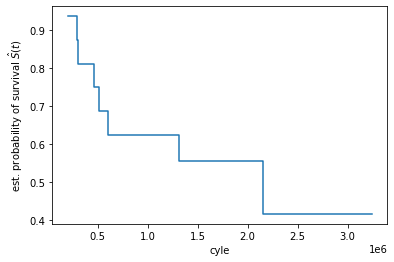

In [21]:
cyle, survival_prob = kaplan_meier_estimator(df_y["Observed"], df_y["F_Time"])
plt.step(cyle, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("cyle")


In [ ]:
#df_y=np.array(df_y)
#df_y

In [12]:
df_x

,NDE_cycle,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio,NLE_ratio_51_17,NLE_ratio_85_17,NLE_ratio_119_17,NLO_avg,Avg_RP,ACEE_30_Avg_58,ACEE_500_Avg_58,ACPD_Avg_58
ID,,,,,,,,,,,,,
41C,0,2.104871,1.185236,1.002988,1.559453,0.893268,1.107898,0.462483,5.576476,190.979294,-0.137640,-2.866030,4.804749
44C,0,2.280959,1.365329,0.998446,1.504218,0.888503,1.140535,0.477160,4.619563,187.204261,-0.596385,-2.788500,3.370729
45C,0,1.245687,0.809970,0.989351,1.282046,0.896534,1.137561,0.491483,3.458337,189.010633,-0.645710,-3.202220,4.186639
19C,450000,0.763296,1.128928,1.002407,1.126849,0.978877,1.235508,0.530102,3.798736,171.925123,-1.065155,-1.570740,3.226957
32C,450000,0.610771,1.137713,0.994283,0.844962,0.844824,1.091099,0.459167,4.296261,169.717689,-0.617190,-1.312415,2.907922
23C,600000,0.397580,0.919473,0.999861,0.846653,0.918699,1.114762,0.495867,5.621833,173.403495,-0.831110,-1.194540,3.061743
25C,600000,0.821445,1.178319,1.003158,1.141313,0.881052,1.083718,0.477500,3.061693,172.727399,-0.912065,-0.927155,3.284087
21C,600000,0.705402,1.151889,0.984968,0.853808,0.929446,1.119635,0.493245,4.626314,174.003954,-0.884900,-1.578795,2.764862
27C,750000,0.144147,0.777585,1.002966,0.394731,0.912962,1.112708,0.500035,5.020607,173.688949,-1.276355,-1.602150,2.746634


In [14]:
# arrange to due:  "y must be a structured array with the first field being a binary class event indicator and the second field the time of the event/censoring"
#df_y=df_y.to_records(index=False)

In [15]:
#estimator = CoxPHSurvivalAnalysis(alpha=0.001, verbose=10)

#estimator.fit(df_x, df_y)

iter      1: update = [ 6.07854501e-06 -6.74208284e+00 -6.92816459e+00  1.16361978e+01
  2.51825462e+01 -3.67219983e+01 -1.25726647e+01  1.39080267e+01
  1.47035066e+00  1.39755256e-01 -2.58750360e+00  8.46120869e-02
 -1.16700222e+00]
iter      1: loss = 0.6750080140
iter      2: update = [-2.01240894e-06  2.60887010e+00 -4.53742085e+00 -3.88318534e+00
 -4.07655666e-02  1.04042585e+00 -1.70267113e+01 -1.65361994e+00
  6.17191958e-02 -2.52735047e-01 -4.28376417e+00 -6.94167747e-01
  7.13273598e-01]
iter      2: loss = 0.5938224239
iter      3: update = [ 1.49436725e-06  9.70348224e-01 -4.79798323e+00 -5.39912661e+00
  3.06928409e+00 -4.57650514e+00  2.25254657e+00  7.41107498e-01
  3.93826427e-01 -9.12777271e-02  4.29533252e-01 -2.21155591e-02
 -3.53409089e-01]
iter      3: loss = 0.5743298772
iter      4: update = [ 6.46146952e-07  6.41069507e-01 -1.90873734e+00 -1.29317653e+00
  7.60752907e-01 -1.72053411e+00  1.17720845e+00 -2.34111644e-01
  6.84113456e-02 -7.05745420e-03  1.40851631

CoxPHSurvivalAnalysis(alpha=0.001, verbose=10)

# Cox Proportional Hazard Model Using Lifelines

In [24]:
df_CoxPHFitter=df.copy()

In [25]:
df_CoxPHFitter.drop(['pos_ratio', 'NDE_cycle', 'NLE_ratio_85_17','NLE_ratio_51_17', 'Avg_RP'], axis=1, inplace=True)
#dropped due to error

In [26]:
cph = CoxPHFitter()
cph.fit(df_CoxPHFitter, 'F_Time', event_col='Observed')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 16 total observations, 8 right-censored observations>
             duration col = 'F_Time'
                event col = 'Observed'
      baseline estimation = breslow
   number of observations = 16
number of events observed = 8
   partial log-likelihood = -12.81
         time fit was run = 2020-11-15 22:10:40 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
diff_two_peaks_ratio   2.13       8.40       3.22            -4.19             8.45                 0.02              4660.08
amp_ratio             12.16   1.91e+05       8.33            -4.16            28.48                 0.02             2.34e+12
energy_ratio         -13.30       0.00       7.48           -27.97             1.36                 0.00                 3.89
NLE_ratio_119_17      18.27   8.64e+07      44.80           -69.52           106.07                 0.00             1.16e+46
NLO_avg               -1.12       0.33       0.86            -2.80             0.56                 0.06                 1.76
ACEE_30_Avg_58        -1.45       0.23       4.44           -10.15             7.24                 0.00              1400.39
ACEE_500_Avg_58       -1.87       0.15       2.14            -6.07             2.34                 0.00                10.35
ACPD_Avg_58            0.57       1.77       1.64            -2.65             3.79                 0.07                44.05

                         z    p   -log2(p)
covariate                                 
diff_two_peaks_ratio  0.66 0.51       0.97
amp_ratio             1.46 0.14       2.79
energy_ratio         -1.78 0.08       3.73
NLE_ratio_119_17      0.41 0.68       0.55
NLO_avg              -1.30 0.19       2.38
ACEE_30_Avg_58       -0.33 0.74       0.43
ACEE_500_Avg_58      -0.87 0.38       1.38
ACPD_Avg_58           0.35 0.73       0.46
---
Concordance = 0.88
Partial AIC = 41.61
log-likelihood ratio test = 12.69 on 8 df
-log2(p) of ll-ratio test = 3.02

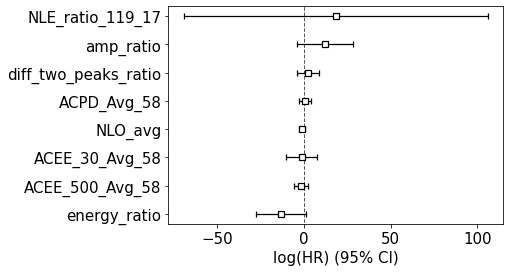

In [27]:
cph.plot()

In [28]:
t_blades=df_CoxPHFitter[df_CoxPHFitter.Observed] # for unfailed ones
t_blades

,Observed,F_Time,diff_two_peaks_ratio,amp_ratio,energy_ratio,NLE_ratio_119_17,NLO_avg,ACEE_30_Avg_58,ACEE_500_Avg_58,ACPD_Avg_58
ID,,,,,,,,,,
41C,True,2154137.0,2.104871,1.185236,1.559453,0.462483,5.576476,-0.137640,-2.866030,4.804749
44C,True,1318034.0,2.280959,1.365329,1.504218,0.477160,4.619563,-0.596385,-2.788500,3.370729
19C,True,464392.0,0.763296,1.128928,1.126849,0.530102,3.798736,-1.065155,-1.570740,3.226957
32C,True,306142.0,0.610771,1.137713,0.844962,0.459167,4.296261,-0.617190,-1.312415,2.907922
21C,True,200007.0,0.705402,1.151889,0.853808,0.493245,4.626314,-0.884900,-1.578795,2.764862
27C,True,297627.0,0.144147,0.777585,0.394731,0.500035,5.020607,-1.276355,-1.602150,2.746634
37C,True,514878.0,0.297536,0.963953,0.745594,0.485316,3.446921,-0.863080,-1.693590,2.375193
42C,True,603724.0,0.514206,1.206035,0.817819,0.493727,6.875911,-0.926840,-1.243770,4.044555


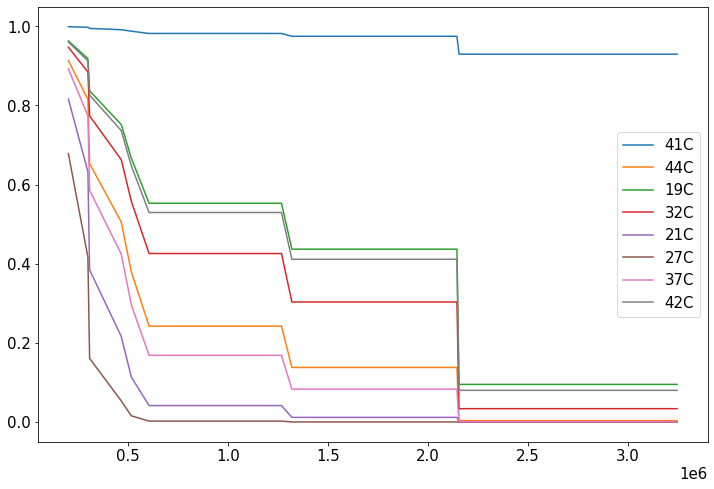

In [29]:

fig= plt.figure(figsize=(12,8))

ax=cph.predict_survival_function(t_blades)
ID=t_blades.index
plt.rc('font', size=15) 
plt.plot(ax)
plt.legend(ID) 
plt.show()


In [31]:
f_blades=df_CoxPHFitter[~df_CoxPHFitter.Observed] # for unfailed ones
f_blades

,Observed,F_Time,diff_two_peaks_ratio,amp_ratio,energy_ratio,NLE_ratio_119_17,NLO_avg,ACEE_30_Avg_58,ACEE_500_Avg_58,ACPD_Avg_58
ID,,,,,,,,,,
45C,False,3245267.0,1.245687,0.809970,1.282046,0.491483,3.458337,-0.645710,-3.202220,4.186639
23C,False,2255225.0,0.397580,0.919473,0.846653,0.495867,5.621833,-0.831110,-1.194540,3.061743
25C,False,1444844.0,0.821445,1.178319,1.141313,0.477500,3.061693,-0.912065,-0.927155,3.284087
26C,False,2829121.0,0.453026,1.052153,0.868000,0.494946,4.831161,-0.687800,-1.269005,3.820881
28C,False,1537912.0,0.307444,1.046796,0.618972,0.432253,7.862192,-0.862720,-1.280955,2.839627
48C,False,1266052.0,0.651178,0.725577,0.852229,0.483285,6.164777,-0.926915,-1.704260,4.225329
39C,False,2101992.0,0.868265,0.656073,0.694331,0.486304,6.348334,-1.192915,-1.126910,3.186447
49C,False,2143805.0,0.444218,1.206881,0.798325,0.490049,6.897756,-0.666275,-1.364115,3.611348


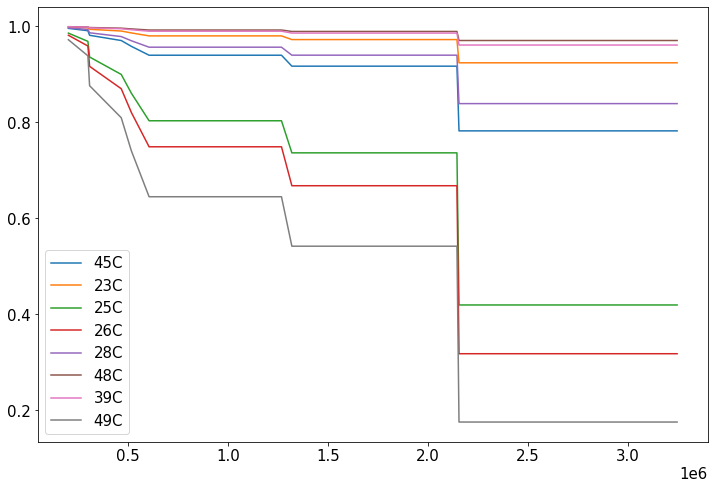

In [32]:
fig= plt.figure(figsize=(12,8))

ax=cph.predict_survival_function(f_blades)
ID=f_blades.index
ID
plt.rc('font', size=15) 
plt.plot(ax)
plt.legend(ID) 
plt.show()



## scaling 

In [34]:
df.columns.tolist()

['Observed',
 'F_Time',
 'NDE_cycle',
 'diff_two_peaks_ratio',
 'amp_ratio',
 'pos_ratio',
 'energy_ratio',
 'NLE_ratio_51_17',
 'NLE_ratio_85_17',
 'NLE_ratio_119_17',
 'NLO_avg',
 'Avg_RP',
 'ACEE_30_Avg_58',
 'ACEE_500_Avg_58',
 'ACPD_Avg_58']

In [45]:
df_scaled=df.copy()

In [46]:
df_scaled[['diff_two_peaks_ratio',
 'amp_ratio',
 'pos_ratio',
 'energy_ratio',
 'NLE_ratio_51_17',
 'NLE_ratio_85_17',
 'NLE_ratio_119_17',
 'NLO_avg',
 'Avg_RP',
 'ACEE_30_Avg_58',
 'ACEE_500_Avg_58',
 'ACPD_Avg_58']] = MinMaxScaler().fit_transform(df_scaled[['diff_two_peaks_ratio',
 'amp_ratio',
 'pos_ratio',
 'energy_ratio',
 'NLE_ratio_51_17',
 'NLE_ratio_85_17',
 'NLE_ratio_119_17',
 'NLO_avg',
 'Avg_RP',
 'ACEE_30_Avg_58',
 'ACEE_500_Avg_58',
 'ACPD_Avg_58']])

In [41]:
df_scaled

,Observed,F_Time,NDE_cycle,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio,NLE_ratio_51_17,NLE_ratio_85_17,NLE_ratio_119_17,NLO_avg,Avg_RP,ACEE_30_Avg_58,ACEE_500_Avg_58,ACPD_Avg_58
ID,,,,,,,,,,,,,,,
41C,True,2154137.0,0,0.917593,0.746081,0.617935,1.000000,0.361383,0.356725,0.308942,0.523859,1.000000,1.000000,0.147772,1.000000
44C,True,1318034.0,0,1.000000,1.000000,0.477711,0.952577,0.325834,0.521246,0.458945,0.324522,0.822448,0.597138,0.181850,0.409761
45C,False,3245267.0,0,0.515506,0.216983,0.196920,0.761826,0.385745,0.506255,0.605323,0.082626,0.907408,0.553822,0.000000,0.745587
19C,True,464392.0,450000,0.289753,0.666691,0.600024,0.628578,1.000000,1.000000,1.000000,0.153535,0.103823,0.185472,0.717114,0.350584
32C,True,306142.0,450000,0.218374,0.679078,0.349186,0.386556,0.000000,0.272039,0.275051,0.257175,0.000000,0.578867,0.830660,0.219270
23C,False,2255225.0,600000,0.118603,0.371374,0.521407,0.388009,0.551092,0.391323,0.650125,0.533307,0.173355,0.391007,0.882471,0.282582
25C,False,1444844.0,600000,0.316966,0.736329,0.623196,0.640996,0.270250,0.234833,0.462413,0.000000,0.141556,0.319913,1.000000,0.374099
21C,True,200007.0,600000,0.262660,0.699064,0.061617,0.394152,0.631258,0.415889,0.623331,0.325929,0.201596,0.343769,0.713573,0.160387
27C,True,297627.0,750000,0.000000,0.171322,0.617270,0.000000,0.508295,0.380970,0.692719,0.408065,0.186781,0.000000,0.703307,0.152884


In [47]:

df_scaled.drop(['pos_ratio', 'NDE_cycle', 'NLE_ratio_85_17','NLE_ratio_51_17'], axis=1, inplace=True)

In [48]:
cph.fit(df_scaled, 'F_Time', event_col='Observed')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 16 total observations, 8 right-censored observations>
             duration col = 'F_Time'
                event col = 'Observed'
      baseline estimation = breslow
   number of observations = 16
number of events observed = 8
   partial log-likelihood = -12.79
         time fit was run = 2020-11-15 23:25:44 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
diff_two_peaks_ratio   3.54      34.34       9.16           -14.41            21.48                 0.00             2.14e+09
amp_ratio              9.44   12609.29       7.91            -6.06            24.94                 0.00             6.81e+10
energy_ratio         -15.94       0.00       9.33           -34.23             2.34                 0.00                10.43
NLE_ratio_119_17       1.96       7.09       4.58            -7.02            10.93                 0.00             55948.33
NLO_avg               -5.70       0.00       4.69           -14.89             3.50                 0.00                33.15
Avg_RP                 1.34       3.83       7.82           -13.97            16.66                 0.00             1.72e+07
ACEE_30_Avg_58        -1.48       0.23       5.22           -11.70             8.74                 0.00              6277.29
ACEE_500_Avg_58       -3.79       0.02       5.62           -14.80             7.21                 0.00              1356.94
ACPD_Avg_58            1.33       3.79       4.06            -6.62             9.29                 0.00             10782.09

                         z    p   -log2(p)
covariate                                 
diff_two_peaks_ratio  0.39 0.70       0.52
amp_ratio             1.19 0.23       2.10
energy_ratio         -1.71 0.09       3.51
NLE_ratio_119_17      0.43 0.67       0.58
NLO_avg              -1.21 0.22       2.15
Avg_RP                0.17 0.86       0.21
ACEE_30_Avg_58       -0.28 0.78       0.36
ACEE_500_Avg_58      -0.68 0.50       1.00
ACPD_Avg_58           0.33 0.74       0.43
---
Concordance = 0.88
Partial AIC = 43.58
log-likelihood ratio test = 12.72 on 9 df
-log2(p) of ll-ratio test = 2.51

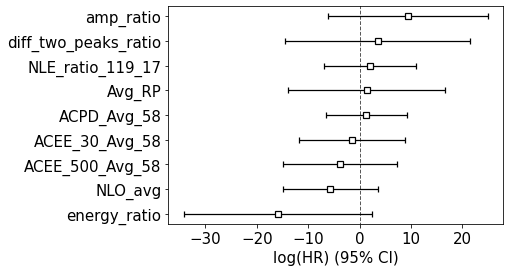

In [49]:
cph.plot()

In [52]:
f_df_scaled=df_scaled[~df_scaled.Observed]
t_df_scaled=df_scaled[df_scaled.Observed]

In [54]:
cph.predict_survival_function(f_df_scaled)

,45C,23C,25C,26C,28C,48C,39C,49C
200007.0,0.996077,0.998784,0.984961,0.983469,0.997664,0.999760,0.999544,0.970759
297627.0,0.991038,0.997217,0.965890,0.962542,0.994657,0.999451,0.998957,0.934290
306142.0,0.980887,0.994045,0.928306,0.921422,0.988583,0.998823,0.997765,0.864421
464392.0,0.969327,0.990404,0.886834,0.876242,0.981633,0.998101,0.996394,0.790412
514878.0,0.956601,0.986360,0.842781,0.828481,0.973944,0.997297,0.994868,0.715349
603724.0,0.937306,0.980159,0.779111,0.759896,0.962206,0.996058,0.992520,0.613347
1266052.0,0.937306,0.980159,0.779111,0.759896,0.962206,0.996058,0.992520,0.613347
1318034.0,0.914079,0.972576,0.707274,0.683186,0.947946,0.994534,0.989636,0.507492
1444844.0,0.914079,0.972576,0.707274,0.683186,0.947946,0.994534,0.989636,0.507492
1537912.0,0.914079,0.972576,0.707274,0.683186,0.947946,0.994534,0.989636,0.507492


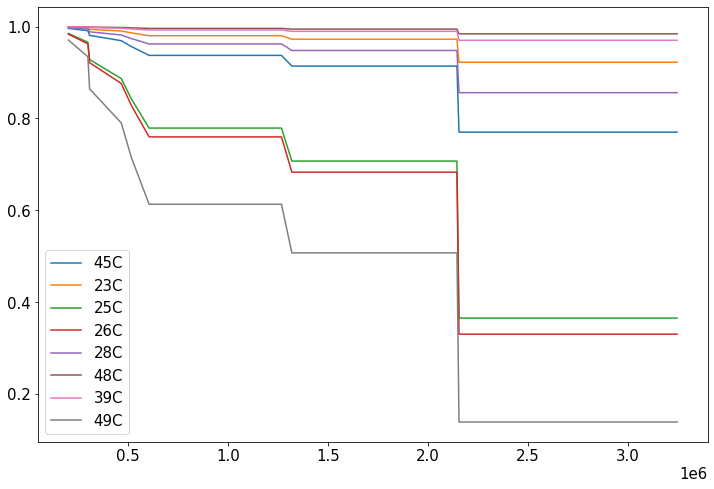

In [55]:

fig= plt.figure(figsize=(12,8))

ax=cph.predict_survival_function(f_df_scaled)
ID=f_df_scaled.index
plt.rc('font', size=15) 
plt.plot(ax)
plt.legend(ID) 
plt.show()


In [87]:
df_gan.drop(['pos_ratio', 'NLE_ratio_85_17','NLE_ratio_51_17'], axis=1, inplace=True)

<lifelines.CoxPHFitter: fitted with 1000 total observations, 486 right-censored observations>
             duration col = 'F_Time'
                event col = 'Observed'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 514
   partial log-likelihood = -2925.04
         time fit was run = 2020-11-15 20:57:07 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
NDE_cyle              -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
diff_two_peaks_ratio   0.03       1.04       0.06            -0.09             0.16                 0.92                 1.17
amp_ratio              7.09    1203.45       0.33             6.44             7.74               628.03              2306.08
energy_ratio          -1.04       0.35       0.32            -1.67            -0.40                 0.19                 0.67
NLE_ratio_119_17      -2.57       0.08       1.79            -6.07             0.93                 0.00                 2.54
NLO_avg               -0.14       0.87       0.05            -0.25            -0.04                 0.78                 0.96
Avg_RP                -0.08       0.92       0.02            -0.11            -0.05                 0.90                 0.95
ACEE_30_Avg_58        -2.23       0.11       0.38            -2.98            -1.49                 0.05                 0.23
ACEE_500_Avg_58       -1.49       0.23       0.18            -1.83            -1.14                 0.16                 0.32
ACPD_Avg_58           -0.85       0.43       0.17            -1.19            -0.52                 0.30                 0.60

                         z      p   -log2(p)
covariate                                   
NDE_cyle             -0.74   0.46       1.13
diff_two_peaks_ratio  0.56   0.57       0.80
amp_ratio            21.38 <0.005     334.35
energy_ratio         -3.21 <0.005       9.55
NLE_ratio_119_17     -1.44   0.15       2.73
NLO_avg              -2.67   0.01       7.05
Avg_RP               -5.22 <0.005      22.44
ACEE_30_Avg_58       -5.85 <0.005      27.57
ACEE_500_Avg_58      -8.35 <0.005      53.70
ACPD_Avg_58          -4.99 <0.005      20.69
---
Concordance = 0.84
Partial AIC = 5870.08
log-likelihood ratio test = 718.61 on 10 df
-log2(p) of ll-ratio test = 488.98

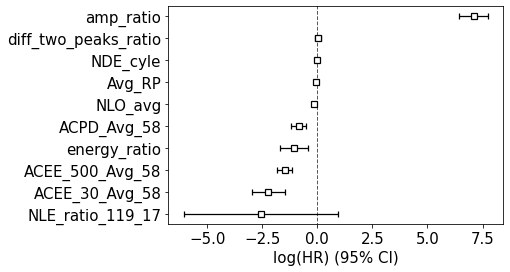

In [88]:

cph = CoxPHFitter()
cph.fit(df_gan, 'F_Time', event_col='Observed')
cph.print_summary()
cph.plot()

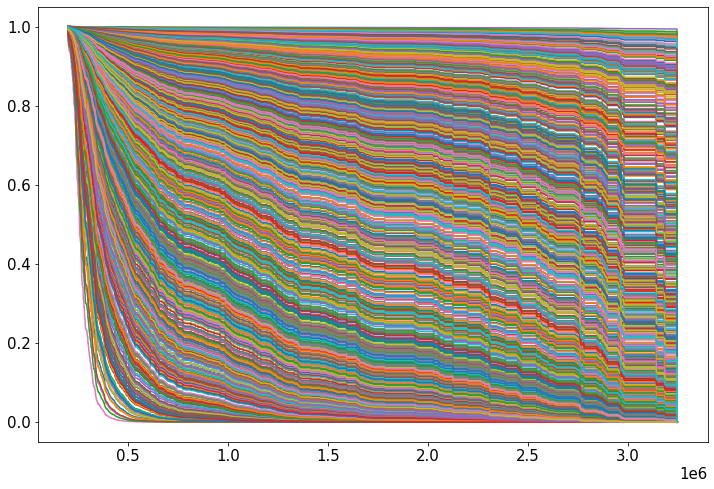

In [95]:
fig= plt.figure(figsize=(12,8))

ax=cph.predict_survival_function(df_gan)

plt.rc('font', size=15) 
plt.plot(ax)
#plt.legend(ID) 
plt.show()